### Guided Project:
# Analyzing Movie Reviews

In this project, you'll be working with Jupyter notebook, and analyzing data on movie review scores. By the end, you'll have a notebook that you can add to your portfolio or build on top of on your own. If you need help at any point, you can consult our solution notebook [here](https://github.com/dataquestio/solutions/blob/master/Mission209Solution.ipynb).<br>

The dataset is stored in the `fandango_score_comparison.csv` file. It contains information on how major movie review services rated movies. The data originally came from [FiveThirtyEight](http://fivethirtyeight.com/features/fandango-movies-ratings/).

Here are the first few rows of the data, in CSV format:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
movies = pd.read_csv('data/fandango_score_comparison.csv')
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


Each row represents a single movie. Each column contains information about how the online moview review services [RottenTomatoes](http://rottentomatoes.com/), [Metacritic](http://metacritic.com/), [IMDB](http://www.imdb.com/), and [Fandango](http://www.fandango.com/) rated the movie. The dataset was put together to help detect bias in the movie review sites. Each of these sites has 2 types of score -- `User` scores, which aggregate user reviews, and `Critic` score, which aggregate professional critical reviews of the movie. Each service puts their ratings on a different scale:

* RottenTomatoes - `0-100`, in increments of `1`.
* Metacritic - `0-100`, in increments of `1`.
* IMDB - `0-10`, in increments of `.1`.
* Fandango - `0-5`, in increments of `.5`.

Typically, the primary score shown by the sites will be the `Critic` score. Here are descriptions of some of the relevant columns in the dataset:

* `FILM` -- the name of the movie.
* `RottenTomatoes` -- the RottenTomatoes (RT) critic score.
* `RottenTomatoes_User` -- the RT user score.
* `Metacritic` -- the Metacritic critic score.
* `Metacritic_User` -- the Metacritic user score.
* `IMDB` -- the IMDB score given to the movie.
* `Fandango_Stars` -- the number of stars Fandango gave the movie.

To make it easier to compare scores across services, the columns were **normalized** so their scale and rounding matched the Fandango ratings. Any column with the suffix `_norm` is the corresponding column changed to a `0-5` scale. For example, `RT_norm` takes the `RottenTomatoes` column and turns it into a `0-5` scale from a `0-100` scale. Any column with the suffix `_round` is the rounded version of another column. For example, `RT_user_norm_round` rounds the `RT_user_norm` column to the nearest `.5`.

## Histograms

3.0    27
4.0    25
2.5    22
1.5    20
3.5    20
4.5    15
2.0    14
1.0     2
0.5     1
Name: Metacritic_norm_round, dtype: int64


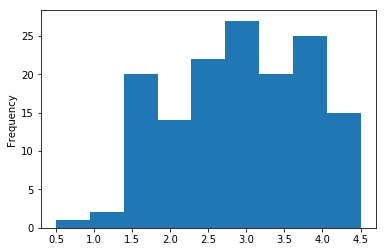

In [3]:
print(movies['Metacritic_norm_round'].value_counts())
movies['Metacritic_norm_round'].plot(kind='hist', bins=9)

4.5    55
4.0    41
3.5    27
3.0    12
5.0    11
Name: Fandango_Stars, dtype: int64


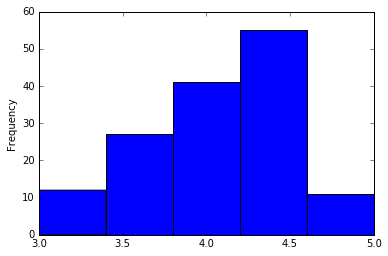

In [17]:
print(movies['Fandango_Stars'].value_counts())
movies['Fandango_Stars'].plot(kind='hist', bins=5)

## Note 1.
### Differences between Metacritic and Fandango ratings

[**Metacritic_norm_round**]
> Relatively close to uniform distribution (except for 0.5-1.0 bound) 
* otherwise we can say that distribution is multi-modal
* There is no ratings higher than 4.5
* Balanced rating distribution in overall.

[**Fandango_stars**]
> Skewed to right (negative skew)
* There is no ratings lower than 3 stars.
* Fandango seems to have positive rating tendency more or less.


## Mean, median, and standard deviation

In [18]:
fs_mean = movies['Fandango_Stars'].mean()
fs_median = np.median(movies['Fandango_Stars'])
fs_std = np.std(movies['Fandango_Stars'])

print(fs_mean, fs_median, fs_std)

4.08904109589 4.0 0.53853216127


In [19]:
mc_mean = movies['Metacritic_norm_round'].mean()
mc_median = np.median(movies['Metacritic_norm_round'])
mc_std = np.std(movies['Metacritic_norm_round'])

print(mc_mean, mc_median, mc_std)

2.97260273973 3.0 0.987561029704


## Review methodology

source article : https://fivethirtyeight.com/features/fandango-movies-ratings/

![](https://espnfivethirtyeight.files.wordpress.com/2015/10/hickey-datalab-fandango-2.png?w=575&quality=90&strip=info)


[Ars Technica notes](http://arstechnica.com/business/2015/10/fivethirtyeight-analysis-finds-inflated-rounded-up-reviews-at-fandango/) **one reason for this inflation is that the star ratings on Fandango are rounded up to the nearest half**, meaning some films got a 0.3, 0.4, and even a 0.5 boost from their original score. A Fandango spokesperson told FiveThirtyEight this was the result of a "software glitch" that would soon be fixed.

## Note 2.

Why would the median for Metacritic_norm_round be lower than the mean, but the median for Fandango_Stars is higher than the mean? Recall that the mean is usually larger than the median when there are a few large values in the data, and lower when there are a few small values.
> Fandango stars distribution is skewed to right - that means there are a few small values. Metacritic points have much less bias / degree of skewness.

Why would the standard deviation for Fandango_Stars be much lower than the standard deviation for Metacritic_norm_round?
> Fandango stars start from 3.0 to 5.0 with 0.5 stepsize while metacritic ranges from 0.5 to 4.5 with 0.5 stepsize (much wider range than Fandango)

Why would the mean for Fandango_Stars be much higher than the mean for Metacritic_norm_round?
> Possibly because Fandango always rounds up the point to the nearest half.


## Scatter plots

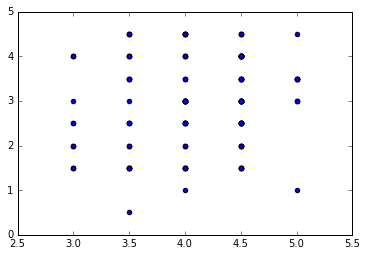

In [20]:
plt.scatter(movies['Fandango_Stars'], movies['Metacritic_norm_round'])

* Top5 movies with the biggest differences between Fandango_Stars and Metacritic_norm_round

In [23]:
movies['fm_diff'] = abs(movies['Metacritic_norm_round'] - movies['Fandango_Stars'])
movies.sort_values(by='fm_diff', ascending=False)[:5]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


## Correlations

In [27]:
from scipy.stats import pearsonr

fm_pearsonr, pval = pearsonr(movies['Fandango_Stars'], movies['Metacritic_user_norm_round'])
fm_pearsonr

0.32359058199626706

### The correlation is actually fairly low. Why?

* It means two values possibly follow different score standards with each other.

In [30]:
from scipy.stats import linregress

slope, intercept, rval, pval, std = linregress(movies['Metacritic_norm_round'], movies['Fandango_Stars'])

# predict what a movie that a 3.0 in Metacritic would get on Fandango
pred_3 = 3 * slope + intercept

pred_3

4.0917071528212041

## Finding residuals

In [31]:
# predict what a movie that a 1.0 in Metacritic would get on Fandango

pred_1 = slope + intercept
pred_1

3.897084996873347

In [32]:
# predict what a movie that a 5.0 in Metacritic would get on Fandango
pred_5 = 5*slope + intercept
pred_5

4.2863293087690604

In [35]:
y_hat = slope*movies['Metacritic_norm_round']+intercept
resid = movies['Fandango_Stars'] - y_hat
resid[:5]

0    0.859637
1    0.859637
2    0.908293
3    1.102915
4   -0.445741
dtype: float64

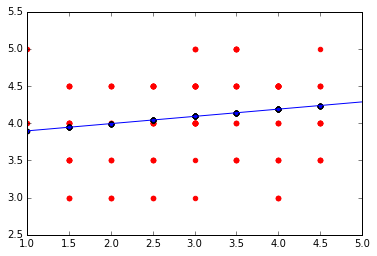

In [51]:
plt.scatter(movies['Metacritic_norm_round'], movies['Fandango_Stars'], color='r')
plt.scatter(movies['Metacritic_norm_round'], y_hat)
plt.plot([1.0, 5.0], [slope+intercept, 5*slope+intercept])
plt.xlim(1, 5); plt.show()